In [ ]:
import matplotlib as mpl
from IPython.display import display, HTML
#sub modules in matplotlib for aliasing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

## Reading an image from a file into an **array**

In [31]:
image = mpimg.imread("/ML_projects/computerVision/imageSegmentation/pexels-pixabay-46216.jpg")

## Displaying image

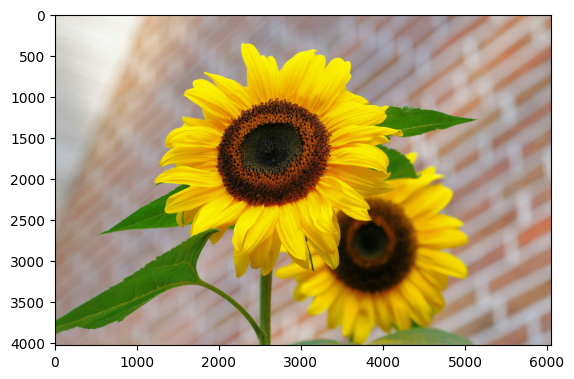

In [32]:
plt.imshow(image)

The image is read as a 3D matrix with (height,width,channels RGB)

In [33]:
image.shape

(4032, 6048, 3)

If you have an RGB image with dimensions (height, width, 3), this code will convert it into an array of shape (height * width, 3). <br>
Each row of this new array represents one pixel with its RGB values.

In [34]:
X = image.reshape(-1,3)

In [35]:
kmeans = KMeans(n_clusters = 10 , n_init = 10)

In [36]:
kmeans.fit(X)

KMeans(n_clusters=10, n_init=10)

Since each pixel is treated as a data point,the algorithm clusters these pixels based on their color values.

kmeans.labels_ <br>
is an array of labels assigned to each pixel, indicating which cluster (out of k clusters) each pixel belongs to. <br>
kmeans.cluster_centers_ <br>
is an array containing the RGB values of the k cluster centers. Each cluster center represents the mean RGB value of all the pixels assigned to that cluster.
### Therefore, <br>
**kmeans.cluster_centers_[kmeans.labels_]** <br>
uses the labels to replace each pixel's original RGB value with the RGB value of the cluster center it belongs to.

In [37]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

 if segmented_img contains integer values in the range [0, 255]. This division scales the values to the range [0, 1] expected by Matplotlib for displaying images.

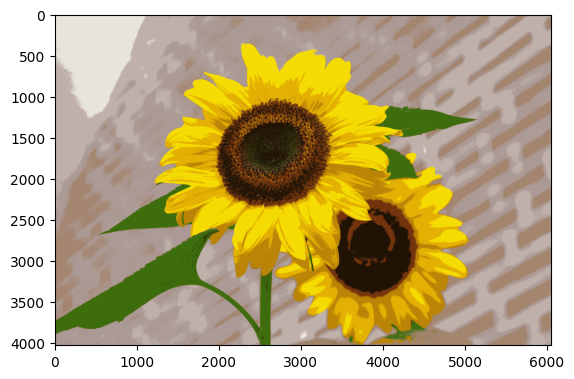

In [38]:
plt.imshow(segmented_img/255)